In [3]:
%pip install numpy matplotlib scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


stock_data_file = 'AAPL.csv'

original_stock_data = pd.read_csv(stock_data_file, index_col=0, parse_dates=True, header=0)

stock_data = original_stock_data


C:\Users\SillySharp\AppData\Local\Temp\ipykernel_17536\3149429464.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_data['Signal'][50:] = [1 if stock_data['50_MA'][i] > stock_data['200_MA'][i] else -1 for i in range(50, len(stock_data))]
C:\Users\SillySharp\AppData\Local\Temp\ipykernel_17536\3149429464.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["co

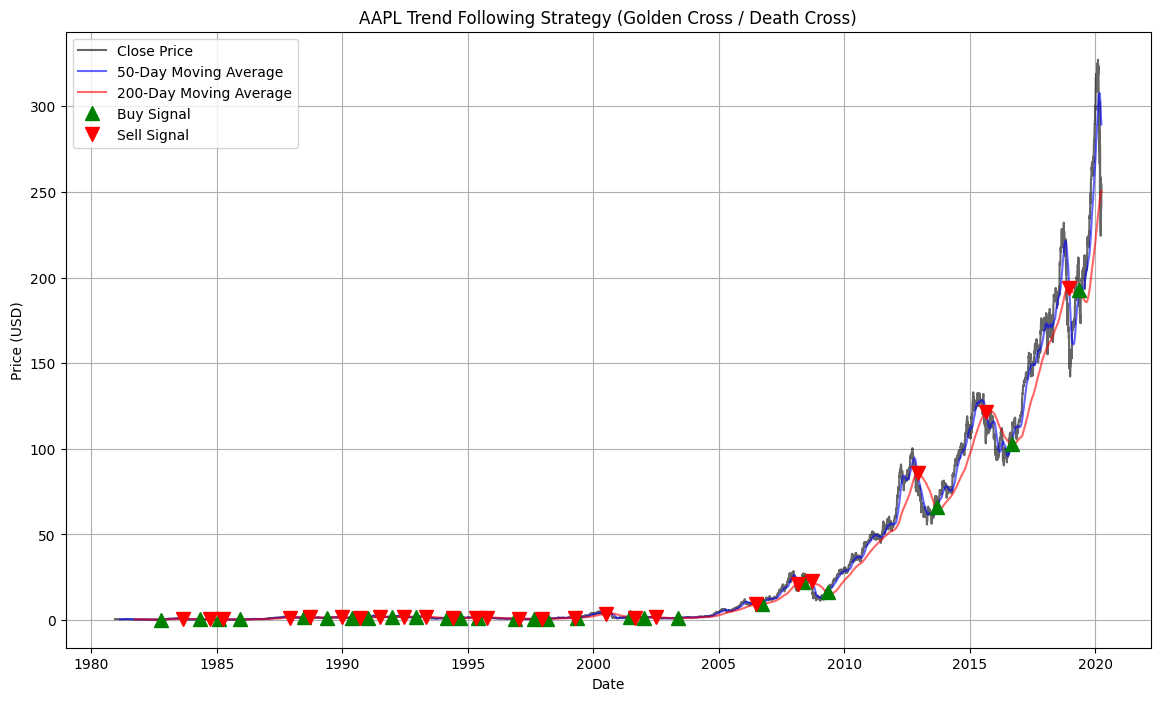

In [5]:
"""
1. Trend Following Strategy
Concept: This strategy involves identifying and following the prevailing market trend (up or down). Traders go long (buy) when the market is in an uptrend and short (sell) when the market is in a downtrend.
Technical Indicators: Moving Averages (e.g., 50-day and 200-day), MACD (Moving Average Convergence Divergence), ADX (Average Directional Index)
Example:
Buy when the 50-day moving average crosses above the 200-day moving average (Golden Cross).
Sell when the 50-day moving average crosses below the 200-day moving average (Death Cross).
Advantages:

Simple to understand and implement.
Can capture long-term trends.
Disadvantages:

May produce false signals in sideways or choppy markets.
Requires patience to hold positions through pullbacks.
"""

# Calculate 50-day and 200-day moving averages
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()

# Generate trading signals
stock_data['Signal'] = 0
stock_data['Signal'][50:] = [1 if stock_data['50_MA'][i] > stock_data['200_MA'][i] else -1 for i in range(50, len(stock_data))]

# Buy Signal (Golden Cross): 50-day MA crosses above 200-day MA
stock_data['Buy_Signal'] = (stock_data['Signal'] == 1) & (stock_data['Signal'].shift(1) == -1)

# Sell Signal (Death Cross): 50-day MA crosses below 200-day MA
stock_data['Sell_Signal'] = (stock_data['Signal'] == -1) & (stock_data['Signal'].shift(1) == 1)

# Plotting the stock data and the signals
plt.figure(figsize=(14, 8))

# Plot the closing price and moving averages
plt.plot(stock_data['Close'], label='Close Price', color='black', alpha=0.6)
plt.plot(stock_data['50_MA'], label='50-Day Moving Average', color='blue', alpha=0.6)
plt.plot(stock_data['200_MA'], label='200-Day Moving Average', color='red', alpha=0.6)

# Plot Buy and Sell signals
plt.plot(stock_data[stock_data['Buy_Signal']].index, stock_data['50_MA'][stock_data['Buy_Signal']], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(stock_data[stock_data['Sell_Signal']].index, stock_data['50_MA'][stock_data['Sell_Signal']], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('AAPL Trend Following Strategy (Golden Cross / Death Cross)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# 52-Week High 

close_prices = original_stock_data.Close
last_close_price = original_stock_data.Close.iloc[-1]
last_date = original_stock_data.index[-1]

last_n_stock_data = original_stock_data[original_stock_data.index >= last_date - pd.Timedelta(days=252)]

max_close_value = last_n_stock_data['Close'].max()

**Momentum**:

- **Momentum** is typically based on price changes over time. You can calculate this by comparing the **price** (e.g., **Close** or **Adj Close**) over a specific period (e.g., 3-month or 6-month returns).
- Formula: `Momentum = (Current Close - Close N-periods ago) / Close N-periods ago`.

In [7]:
# Momentum

import datetime


last_row = original_stock_data.iloc[-1] # acts as current value

current_close = last_row["Close"]

date_to_query = datetime.datetime(2009, 7, 28)

#   240.91000366210938   (2020-04-01)   
# - 22.85714340209961    (2009-07-28)
# -----------------------------------
# = 218.0528603

#   218.0528603
# / 22.85714340209961
# -----------------------------------
# = 9.539812411 ~ 9.539812408928574

if date_to_query in original_stock_data.index:
    close_at_query_date = original_stock_data.loc[date_to_query, "Close"]
    close_price_momentum = (current_close - close_at_query_date) / close_at_query_date
    print(close_price_momentum)
else:
    print(f"Date {date_to_query} not found in stock data.")

9.539812408928574


**Volume Variance**:

- **Volume Variance** can be calculated by taking the standard deviation of **Volume** over a given period (for example, monthly or weekly).
- Formula: `Variance = std(Volume)` over a period.

## **Formula for Variance (σ²):**  

σ² = ( Σ (xᵢ - μ)² ) / n  

Where:  
- **xᵢ** = Each individual volume  
- **μ** = Mean of the volume values  
- **n** = Number of observations  

## **Formula for Standard Deviation (σ):**  

σ = √σ²  

This calculates the **rolling standard deviation** of volume over a period (e.g., last 7 days). 🚀


# **Volume Variance Calculation (Last 7 Days)**  

## **Data**  

| Date       | Volume    |  
|------------|----------|  
| 1981-01-12 | 3,843,200 |  
| 1981-01-13 | 3,460,800 |  
| 1981-01-14 | 3,572,800 |  
| 1981-01-15 | 3,516,800 |  
| 1981-01-16 | 3,348,800 |  

---

## **Step 1: Compute Mean**  

**Sum of volumes:**  
3,843,200 + 3,460,800 + 3,572,800 + 3,516,800 + 3,348,800 = **17,742,400**  

**Mean:**  
17,742,400 ÷ 5 = **3548480**  

---

## **Step 2: Compute Deviations**  

| Volume    | Deviation from Mean |  
|----------|---------------------|  
| 3,843,200 | 294720 |  
| 3,460,800 | -87680 |  
| 3,572,800 | 24320 |  
| 3,516,800 | -31680 |  
| 3,348,800 | -199680 |  

---

## **Step 3: Square the Deviations**  

| Volume    | Deviation from Mean | Squared Deviation |  
|----------|---------------------|------------------|  
| 3,843,200 | 294720 | 8.68598784\times10^{10} |  
| 3,460,800 | -87680 | 7.6877824\times10^{9} |  
| 3,572,800 | 24320 | 591462400 |  
| 3,516,800 | -31680 | 1.0036224\times10^{9} |  
| 3,348,800 | -199680 | 3.98721024\times10^{10} |  

**Sum of squared deviations:**  
8.68598784\times10^{10} + 7.6877824\times10^{9} + 591462400 + 1.0036224\times10^{9} + 3.98721024\times10^{10} = **1.36014848\times10^{11}**  

---

## **Step 4: Compute Variance**  

**Variance:**  
1.36014848\times10^{11} ÷ 5 = **2.72029696\times10^{10}**  

---

## **Step 5: Compute Standard Deviation**  

**Standard deviation:**  
√(2.72029696\times10^{10}) ≈ **164933.2277**  

---

## **Final Answer:**  
The rolling standard deviation (volume variance) for the last 7 days is **≈ 164933.2277**.


In [8]:
from typing import Final

# Set the period for the rolling window (e.g., 7 days for weekly variance)
ROLLING_WINDOW_DAYS: Final[int] = 7

original_stock_data['Volume_Variance'] = original_stock_data['Volume'].rolling(window=ROLLING_WINDOW_DAYS).std()

# Display the volume variance
print(original_stock_data[['Volume', 'Volume_Variance']].tail())

              Volume  Volume_Variance
Date                                 
2020-03-26  63021800     1.230498e+07
2020-03-27  51054200     1.576774e+07
2020-03-30  41994100     1.981950e+07
2020-03-31  49250500     1.562744e+07
2020-04-01  43956200     1.357188e+07
